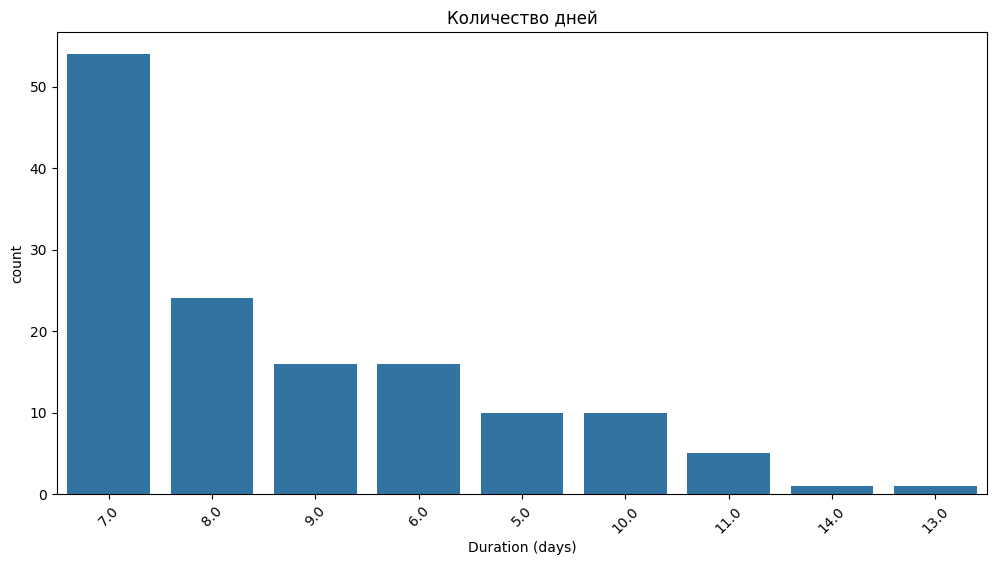

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder = '../diagram'
pdf_path = os.path.join(folder, 'count_days.png')

df = pd.read_csv('../data/Travel_details_dataset.csv') 

df['Duration (days)'] = pd.to_numeric(df['Duration (days)'], errors='coerce')
duration_counts = df['Duration (days)'].value_counts()

sorted_values = duration_counts.sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Duration (days)', order=sorted_values)

plt.xticks(rotation=45)
plt.title('Количество дней')
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.show()


## Самое популярное количество дней во время путешествия 

Самая популярная продолжительность поездок составляет **7 дней**. Это говорит о том, что пользователи предпочитают недельные путешествия, которые популярны среди офисных работников, так как удобно использовать во время отпуска.

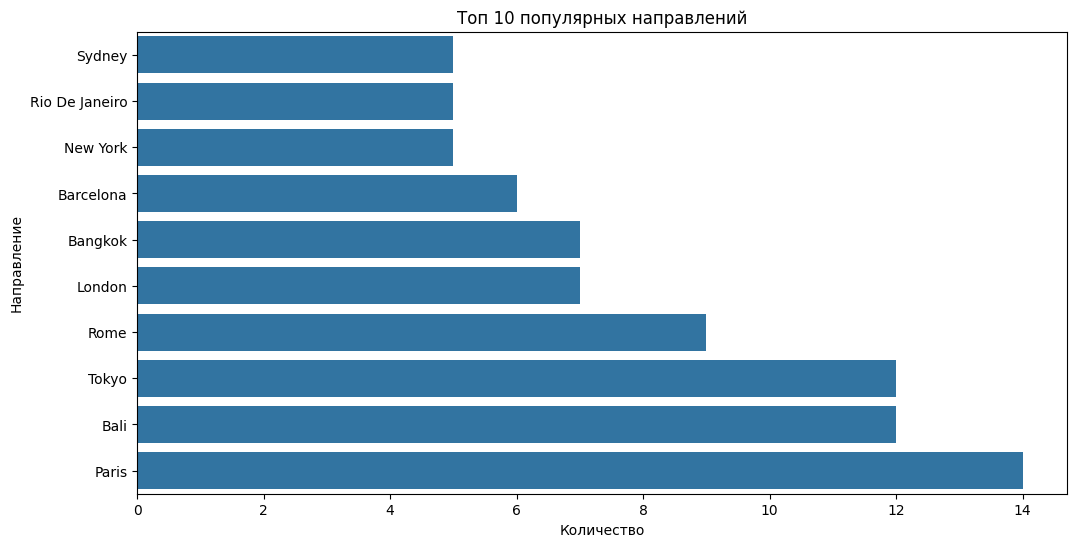

In [28]:
folder = '../diagram'
pdf_path = os.path.join(folder, 'travel_destinations.png')

df = pd.read_csv('../data/Travel_details_dataset.csv') 

mapping = {
    'Paris, France': 'Paris',
    'Paris': 'Paris',
    'Rome, Italy': 'Rome',
    'Tokyo, Japan': 'Tokyo',
    'London, Uk': 'London',
    'Bangkok, Thailand': 'Bangkok',
    'Barcelona, Spain': 'Barcelona',
    'Bali, Indonesia': 'Bali',
    'Rio De Janeiro, Brazil': 'Rio De Janeiro'
}

df['Destination'] = df['Destination'].str.strip().str.title().replace(mapping)

counts = df['Destination'].value_counts().sort_values(ascending=True).tail(10)  


plt.figure(figsize=(12,6))
sns.barplot(x=counts.values, y=counts.index) 
plt.title('Топ 10 популярных направлений')
plt.xlabel('Количество')
plt.ylabel('Направление')
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.show()

## Популярные направления

**Paris** — безоговорочный лидер, он значительно опережает остальные направления. Это говорит о высокой привлекательности Парижа среди туристов. Париж — универсальный выбор, он опережает все направления с отрывом. 
Европейский регион явно доминирует в списке. Люди склонны выбирать культурные и туристически известные города: Paris, Rome, London.

**Bali и Tokyo** — популярные экзотические направления. Вероятно, люди выбирают их ради уникальной культуры и природы. Есть спрос на экзотику и пляжный отдых: Bali, Bangkok, Rio.

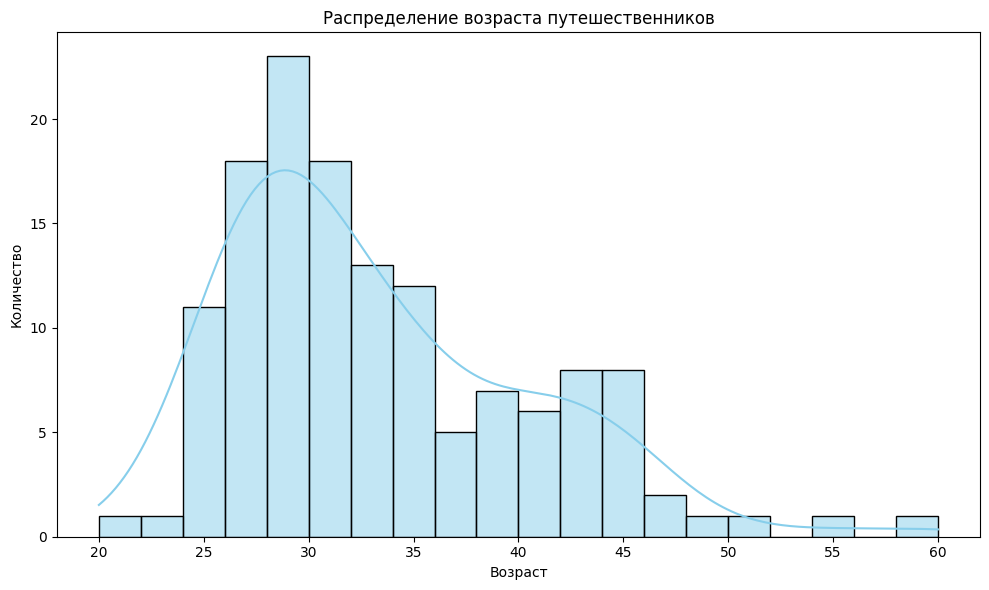

In [29]:
folder = '../diagram'
pdf_path = os.path.join(folder, 'ageOfTravels.png')

df = pd.read_csv('../data/Travel_details_dataset.csv') 
plt.figure(figsize=(10, 6))
sns.histplot(df['Traveler age'], kde=True, bins=20, color='skyblue')
plt.title('Распределение возраста путешественников')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.tight_layout()
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.show()

## Возрастные группы

Самая многочисленная категория путешественников находится в возрасте **от 28 до 32 лет**. Особенно выделяется возраст около 30 лет.

Возрастной диапазон находятся в диапазоне от 25 до 40 лет. После 40 лет количество путешественников значительно снижается. В возрасте до 25 лет и после 50 лет число путешественников минимально, но всё же присутствует. После 40 лет интерес к путешествиям, вероятно, снижается (по данным конкретного набора).

/var/folders/nk/0h7gpd8s57j_zmvzp7x5gjgh0000gn/T/ipykernel_2191/2187170914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trips.index, y=monthly_trips.values, palette='coolwarm')


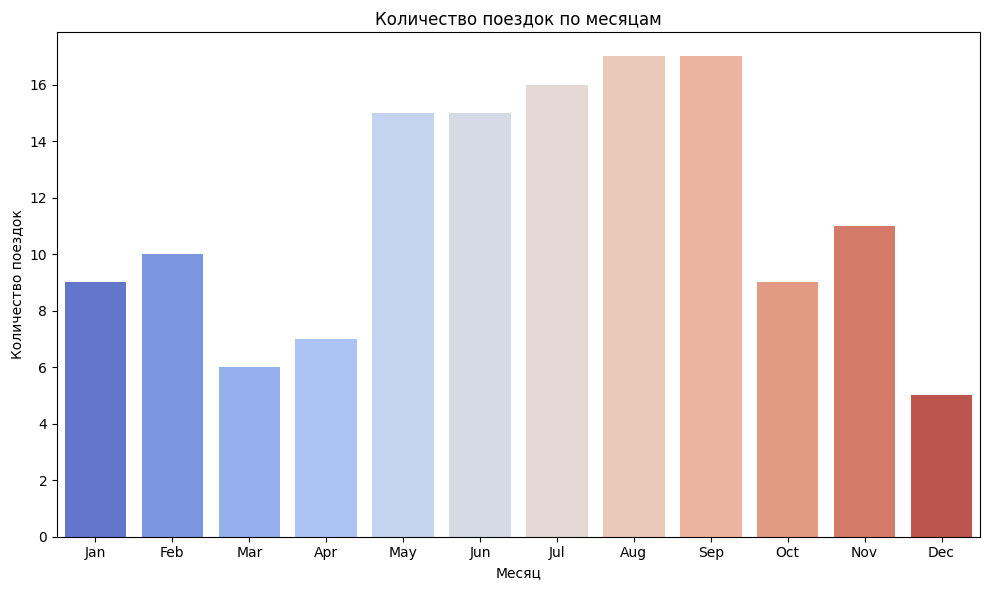

In [36]:
df['Start date'] = pd.to_datetime(df['Start date'])
df['Month'] = df['Start date'].dt.month

folder = '../diagram'
pdf_path = os.path.join(folder, 'count_trip.png')

monthly_trips = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trips.index, y=monthly_trips.values, palette='coolwarm')
plt.title('Количество поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.show()


## Популярные месяцы 

Пики активности - **Летом** (июнь, июль, август) — из-за отпускного сезона. В январе — новогодние праздники. 
В марте количество поездок может быть ниже (холодная погода, финансовое восстановление после праздников).

Эти данные будут полезны для туроператоров, чтобы планировать акции, скидки в низкий сезон. Так же транспортных компаний и отелей: для регулирования цен и загруженности.

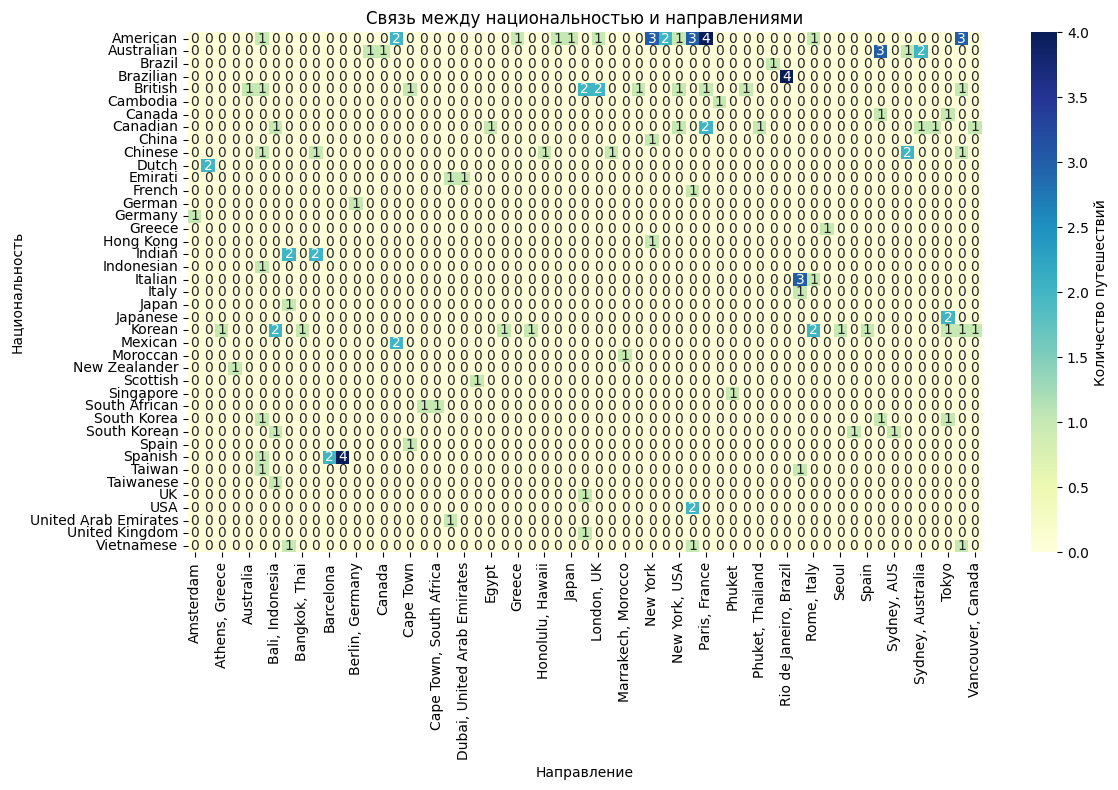

In [34]:

nationality_destination = pd.crosstab(df['Traveler nationality'], df['Destination'])
nationality_destination.head()

folder = '../diagram'
pdf_path = os.path.join(folder, 'nationality_and_directions.png')

plt.figure(figsize=(12, 8))
sns.heatmap(nationality_destination, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Количество путешествий'})
plt.title('Связь между национальностью и направлениями')
plt.xlabel('Направление')
plt.ylabel('Национальность')
plt.tight_layout()
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.show()



## Связь между национальностью и направлениями путешествиями

- Американцы чаще всего путешествуют в Париж, Лондон, Сидней и Токио.

- У бразильцев более развит внутренний туризм. Это видно из тошго, что они часто летают в Рио-де-Жанейро.

- Французы и британцы чаще едут в Европейские направления, например, Барселону, Берлин.

- Париж, Лондон, Бангкок, Токио и Рим являются наиболее часто посещаемыми городами для многих национальностей.

- Глобальная популярность Парижа и Лондона. Эти города востребованы у множества национальностей, что говорит об их туристической привлекательности.

- Многие национальности отдают предпочтение путешествиям в близлежащие или культурно схожие страны. 

   Accommodation cost  Transportation cost
0              1200.0                600.0
1               800.0                500.0
2              1000.0                700.0
3              2000.0               1000.0
4               700.0                200.0


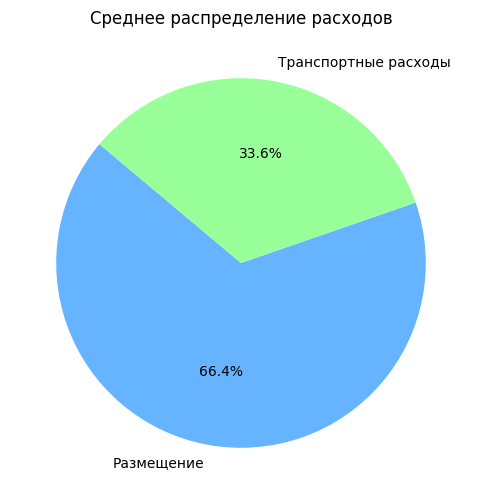

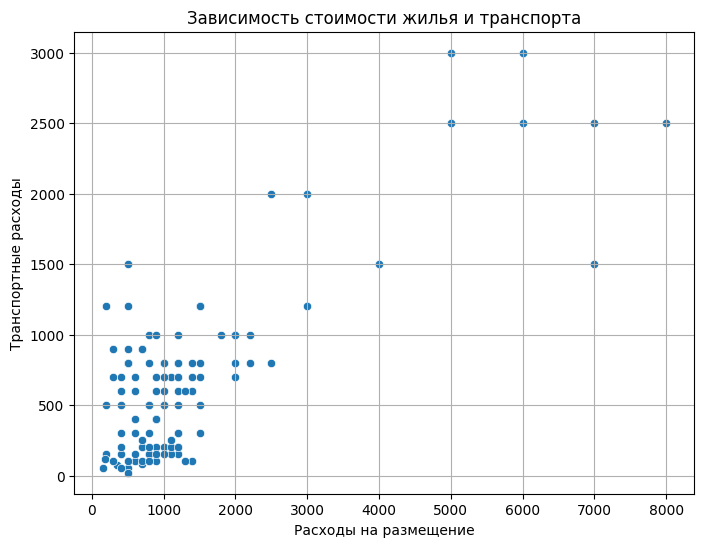

In [40]:

df['Accommodation cost'] = df['Accommodation cost'].replace({'\$': '', ',': ''}, regex=True)
df['Accommodation cost'] = pd.to_numeric(df['Accommodation cost'], errors='coerce')

df['Transportation cost'] = df['Transportation cost'].replace({'\$': '', ',': ''}, regex=True)
df['Transportation cost'] = pd.to_numeric(df['Transportation cost'], errors='coerce')

print(df[['Accommodation cost', 'Transportation cost']].head())

folder = '../diagram'

mean_accommodation = df['Accommodation cost'].mean()
mean_transport = df['Transportation cost'].mean()

plt.figure(figsize=(6,6))
plt.pie([mean_accommodation, mean_transport], labels=['Размещение', 'Транспортные расходы'],
        autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Среднее распределение расходов')

pie_path = os.path.join(folder, 'mean_expenses_pie.png')
plt.savefig(pie_path, dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Accommodation cost', y='Transportation cost', data=df)
plt.title('Зависимость стоимости жилья и транспорта')
plt.xlabel('Расходы на размещение')
plt.ylabel('Транспортные расходы')
plt.grid(True)

scatter_path = os.path.join(folder, 'expenses_scatter.png')
plt.savefig(scatter_path, dpi=300, bbox_inches='tight')
plt.show()

## Зависимости расходов жилья и стоимости обучения

Большинство путешественников тратят умеренно как на жилье, так и на транспорт. 
Есть несколько выбросов: стоимость проживания достигает 7000-8000 и транспорт до 3000.
Это могут быть:
- Люксовые поездки
- Долгосрочные туры
- Дорогие направления

Линейной зависимости стоимостью жилья и транспорта нет — видно, что высокая стоимость проживания не всегда сопровождается высокой стоимостью транспорта и наоборот.

Это говорит о том, можно потратиться много на жильё, но минимально на транспорт и наоборот.